### Importing libraries

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

### Creating dataframe to read from dataset

In [2]:
df = pd.read_csv('Downloads/insurance_data.csv')
df.head()

,age,affordibility,bought_insurance
0,22,1,0
1,25,0,0
2,47,1,1
3,52,0,0
4,46,1,1


### Scaling the data within [0,1] by dividing by 100

In [3]:
scaled_df = df
scaled_df['age'] = df['age']/100
scaled_df.head()

,age,affordibility,bought_insurance
0,0.22,1,0
1,0.25,0,0
2,0.47,1,1
3,0.52,0,0
4,0.46,1,1


#### Splitting into testing and training set

In [16]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(scaled_df.drop(['bought_insurance'],axis=1),scaled_df['bought_insurance'],test_size = 0.2)

## First we train an ANN using the tensorflow libraries and then compare the performance with our model created using Numpy

### Initializing and training a neural network with training data

In [17]:
model = keras.Sequential([
    keras.layers.Dense(1,input_shape = (2,),activation='sigmoid',kernel_initializer='ones', bias_initializer='zeros')
])
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

C:\Users\mehta\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [21]:
epochs = 5000
accuracy_threshold = 0.90
batch_size = 32

for epoch in range(epochs):
    history = model.fit(X_train, y_train, epochs=1, batch_size=batch_size, verbose=0)
    train_accuracy = history.history['accuracy'][0]
    print(f'Epoch {epoch+1}/{epochs} - train_accuracy: {train_accuracy:.4f}')
    if train_accuracy >= accuracy_threshold:
        print(f"\nReached {accuracy_threshold*100:.2f}% training accuracy, stopping training.")
        break

Epoch 1/5000 - train_accuracy: 0.5455
Epoch 2/5000 - train_accuracy: 0.5455
Epoch 3/5000 - train_accuracy: 0.5455
Epoch 4/5000 - train_accuracy: 0.5455
Epoch 5/5000 - train_accuracy: 0.5455
Epoch 6/5000 - train_accuracy: 0.5455
Epoch 7/5000 - train_accuracy: 0.5455
Epoch 8/5000 - train_accuracy: 0.5455
Epoch 9/5000 - train_accuracy: 0.5455
Epoch 10/5000 - train_accuracy: 0.5455
Epoch 11/5000 - train_accuracy: 0.5455
Epoch 12/5000 - train_accuracy: 0.5455
Epoch 13/5000 - train_accuracy: 0.5455
Epoch 14/5000 - train_accuracy: 0.5455
Epoch 15/5000 - train_accuracy: 0.5455
Epoch 16/5000 - train_accuracy: 0.5455
Epoch 17/5000 - train_accuracy: 0.5455
Epoch 18/5000 - train_accuracy: 0.5455
Epoch 19/5000 - train_accuracy: 0.5455
Epoch 20/5000 - train_accuracy: 0.5455
Epoch 21/5000 - train_accuracy: 0.5455
Epoch 22/5000 - train_accuracy: 0.5455
Epoch 23/5000 - train_accuracy: 0.5455
Epoch 24/5000 - train_accuracy: 0.5455
Epoch 25/5000 - train_accuracy: 0.5455
Epoch 26/5000 - train_accuracy: 0.

In [53]:
model.evaluate(X_train,y_train)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.8182 - loss: 0.4795


[0.47947171330451965, 0.8181818127632141]

#### We get an accuracy of 100% on our testing data

In [25]:
y_test

13    0
1     0
15    1
24    1
21    0
0     0
Name: bought_insurance, dtype: int64

## Creating the ANN model using Numpy

In [27]:
coef,intercept=model.get_weights()
coef,intercept

(array([[5.3664412],
        [1.1024728]], dtype=float32),
 array([-2.7843258], dtype=float32))

#### Initializing the sigmoid function (activation function)

In [29]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

### Calculating the activation using weights found from training ANN using sigmoid(weighted_sum)

In [31]:
def predict(age,affordibility):
    w1= coef[0]
    w2= coef[1]
    b= intercept
    weighted_sum=w1*(age/100)+w2*affordibility+b
    activation=sigmoid(weighted_sum)
    return activation

In [33]:
X_test.head()

,age,affordibility
13,0.29,0
1,0.25,0
15,0.55,1
24,0.50,1
21,0.26,0


In [35]:
model.predict(X_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


array([[0.22652152],
       [0.19112518],
       [0.78068966],
       [0.73132735],
       [0.19955929],
       [0.37725025]], dtype=float32)

In [37]:
predict(60,1)

array([0.82317555], dtype=float32)

### Initializing the loss function(here we use the log loss) 
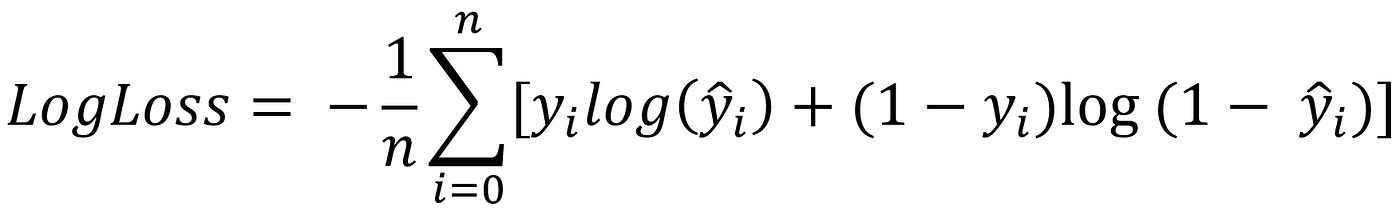

In [39]:
def log_loss(y_true, y_predicted):
    epsilon = 1e-15
    y_predicted_new = [max(i,epsilon) for i in y_predicted]
    y_predicted_new = [min(i,1-epsilon) for i in y_predicted_new]
    y_predicted_new = np.array(y_predicted_new)
    return -np.mean(y_true*np.log(y_predicted_new)+(1-y_true)*np.log(1-y_predicted_new))

### Here we implement our own gradient descent function, fit method and predict method to replciate functioning neural network 
#### Weighted sum and loss function calculation
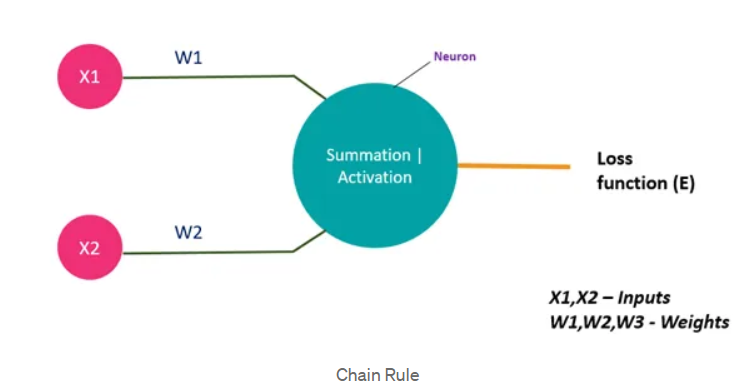
#### Gradient descent calculation
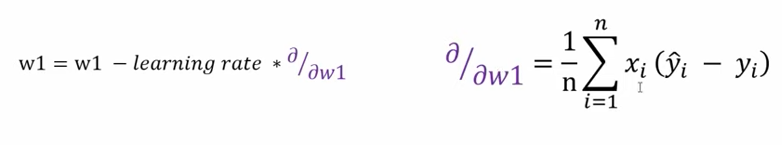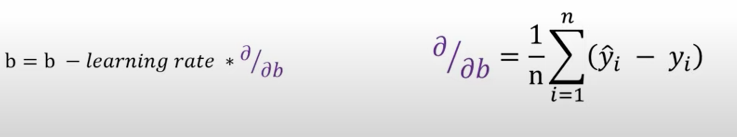

### The *fit* function uses this gradient descent function to calculate the weights and bias values and the *predict* function uses these values to calculate return value 

In [41]:
class NeuralNetwork:
    def __init__(self):
        # Initialization of weights and biases
        self.w1 = 1   
        self.w2 = 1
        self.bias = 0
    def gradient_descent(self,age,affordability,y_true,epochs,loss_threshold):
        # Initialization of weights and biases inside function
        w1=1
        w2=1
        bias=0
        n=len(age)
        learning_rate=0.5    
        for i in range(epochs):
            weighted_sum=w1*age+w2*affordability+bias  # Weighted Sum calculation
            y_predicted = sigmoid(weighted_sum)        # y_predicted using sigmoid(weighted_sum)
            loss=log_loss(y_true,y_predicted)          #Calculating the loss function
            
            w1d = (1/n)*np.dot(np.transpose(age),(y_predicted-y_true))  #bias-learning_rate*bias_D
            w2d = (1/n)*np.dot(np.transpose(affordability),(y_predicted-y_true)) 
            bias_d = np.mean(y_predicted-y_true)
            w1 = w1 - learning_rate * w1d
            w2 = w2 - learning_rate * w2d
            bias = bias - learning_rate * bias_d
            if i%50==0:
                print (f'Epoch:{i}, w1:{w1}, w2:{w2}, bias:{bias}, loss:{loss}')
            if loss<=loss_threshold:
                print (f'Epoch:{i}, w1:{w1}, w2:{w2}, bias:{bias}, loss:{loss}')
                break
        return w1,w2,bias
    
    def fit(self,X,y_test,epochs,loss_threshold):
        self.w1, self.w2, self.bias = self.gradient_descent(X['age'],X['affordibility'],y_test, epochs, loss_threshold)
        print(f"Final weights and bias: w1: {self.w1}, w2: {self.w2}, bias: {self.bias}")        
    def predict(self,X_test):
        weighted_sum=self.w1*X_test['age']+self.w2*X_test['affordibility']+self.bias
        return sigmoid(weighted_sum)

### Training our neural network

In [63]:
myNN=NeuralNetwork()
myNN.fit(X_train,y_train,epochs=5000,loss_threshold=0.47947171330451965) # We use loss threshold as training loss from our ANN model

Epoch:0, w1:0.9797165871623975, w2:0.9348164693089044, bias:-0.101173682680735, loss:0.7121839181024178
Epoch:50, w1:1.6265586101478369, w2:0.799616462875209, bias:-0.995034606796099, loss:0.5899685290192404
Epoch:100, w1:2.3722901419395073, w2:0.8947449924205176, bias:-1.382619970630554, loss:0.5611967116422487
Epoch:150, w1:3.0464143163433604, w2:0.9515165135108283, bias:-1.708201950732848, loss:0.5385453416552465
Epoch:200, w1:3.653165279416644, w2:0.9922854152028255, bias:-1.9921801614840762, loss:0.5204496053089777
Epoch:250, w1:4.199268272625332, w2:1.0263246136758324, bias:-2.2452168388122087, loss:0.5058535840118439
Epoch:300, w1:4.691800549857916, w2:1.057401693078683, bias:-2.4735216823694164, loss:0.4939804437360745
Epoch:350, w1:5.137352169198258, w2:1.0869777987712412, bias:-2.681139965188448, loss:0.4842445702390989
Epoch:379, w1:5.376577558710155, w2:1.1036646595135269, bias:-2.793254808034519, loss:0.47939677500798034
Final weights and bias: w1: 5.376577558710155, w2: 1

In [65]:
coef,intercept

(array([[5.3664412],
        [1.1024728]], dtype=float32),
 array([-2.7843258], dtype=float32))

### The weights w1,w2 and bias b from our tensorflow model were (5.3664412,1.1024728,-2.7843258) and the ones obtained from our Numpy model were (5.376577558710155,1.1036646595135269,-2.793254808034519) respectively

In [67]:
model.predict(X_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


array([[0.22652152],
       [0.19112518],
       [0.78068966],
       [0.73132735],
       [0.19955929],
       [0.37725025]], dtype=float32)

In [69]:
myNN.predict(X_test)

13    0.225474
1     0.190139
15    0.780319
24    0.730803
21    0.198556
0     0.375957
dtype: float64

#### myNN model predicted values align with the tensorflow model values, indicating that our model is successful